# 1. Input the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# 2. Load the dataset after loading the dataset, you have to normalize every image.

In [3]:
# load dataset
df = np.load('ORL_faces.npz')
print(df.files) # dataset came split into test and train datasets

['testY', 'testX', 'trainX', 'trainY']


In [4]:
X_test = df['testX']
y_test = df['testY']
X_train = df['trainX']
y_train = df['trainY']
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

(160, 10304) (160,) (240, 10304) (240,)


In [5]:
# range is 0 and 255 so we divide by 255 to get range of 0 and 1
X_train = X_train/255
X_test = X_test/255
print(X_train.shape,X_test.shape)

(240, 10304) (160, 10304)


# 3. Split the dataset
#### We have been given the data split into train and test but we need to further split this to include a validation dataset so we can tune the hyperparameters of our classifier 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.1)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(216, 10304) (24, 10304) (216,) (24,)


# 4. Transform the images to equal sizes to feed in CNN

In [7]:
# It is the second value in the shape that is being reshaped so we must know what this value is first
print(X_train.shape[1],
X_test.shape[1], 
X_valid.shape[1]) # confirm correct shape for each

10304 10304 10304


In [8]:
# We decide on the length and width with the first number being the rows and the second the columns
# we choose dimensions that are factors of 10304 to make this possible
im_shape = (112,92,1)

In [9]:
# Reshape into 4 dimensions
X_train = X_train.reshape(X_train.shape[0],*im_shape)
X_test = X_test.reshape(X_test.shape[0],*im_shape)
X_valid = X_valid.reshape(X_valid.shape[0],*im_shape)
print(X_train.shape, X_valid.shape, X_test.shape)

(216, 112, 92, 1) (24, 112, 92, 1) (160, 112, 92, 1)


# 5. Build a CNN model that has 3 main layers & 6. Train the Model

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, LeakyReLU, PReLU
from keras.optimizers import Adam

In [11]:
# import activation functions
from tensorflow.keras.activations import sigmoid, tanh, relu, elu
leaky_relu = LeakyReLU(alpha=0.01)
para_relu = PReLU()

In [12]:
# define some parameters here to save time while manually tuning
activation = leaky_relu
Drop = 0.5

In [13]:
model = Sequential() #initialize Sequential model

model.add(Conv2D(128, kernel_size=4,activation=activation,input_shape=im_shape)) # i. Convolutional Layer
model.add(MaxPooling2D(pool_size=2))                     # ii. Pooling Layer
model.add(Conv2D(128,3, activation=activation)) 
model.add(MaxPooling2D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(128, activation=activation))                  # iii. Fully Connected Layer
model.add(Dropout(Drop))                  # we add a dropout rate to prevent overfitting
model.add(Dense(128, activation=activation))
model.add(Dropout(Drop))
model.add(Dense(128, activation=activation))
model.add(Dropout(Drop))

model.add(Dense(64, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

history = model.fit(X_train,
                    y_train, 
                    batch_size=32,
                    epochs=90, 
                    verbose=2,
                    validation_data=(X_valid,y_valid))

Epoch 1/90
7/7 - 10s - loss: 4.2585 - accuracy: 0.0370 - val_loss: 4.1036 - val_accuracy: 0.0000e+00 - 10s/epoch - 1s/step
Epoch 2/90
7/7 - 7s - loss: 4.0249 - accuracy: 0.0324 - val_loss: 3.8806 - val_accuracy: 0.0000e+00 - 7s/epoch - 963ms/step
Epoch 3/90
7/7 - 6s - loss: 3.8835 - accuracy: 0.0370 - val_loss: 3.7913 - val_accuracy: 0.0000e+00 - 6s/epoch - 918ms/step
Epoch 4/90
7/7 - 7s - loss: 3.7299 - accuracy: 0.0694 - val_loss: 3.5897 - val_accuracy: 0.0000e+00 - 7s/epoch - 931ms/step
Epoch 5/90
7/7 - 6s - loss: 3.5483 - accuracy: 0.0509 - val_loss: 3.6165 - val_accuracy: 0.0000e+00 - 6s/epoch - 915ms/step
Epoch 6/90
7/7 - 6s - loss: 3.5867 - accuracy: 0.0417 - val_loss: 3.5192 - val_accuracy: 0.0000e+00 - 6s/epoch - 906ms/step
Epoch 7/90
7/7 - 7s - loss: 3.4421 - accuracy: 0.0509 - val_loss: 3.4734 - val_accuracy: 0.0000e+00 - 7s/epoch - 949ms/step
Epoch 8/90
7/7 - 7s - loss: 3.3673 - accuracy: 0.0556 - val_loss: 3.2984 - val_accuracy: 0.0000e+00 - 7s/epoch - 999ms/step
Epoch 9/9

Epoch 70/90
7/7 - 6s - loss: 0.1685 - accuracy: 0.9444 - val_loss: 0.0159 - val_accuracy: 1.0000 - 6s/epoch - 898ms/step
Epoch 71/90
7/7 - 7s - loss: 0.1521 - accuracy: 0.9537 - val_loss: 0.0197 - val_accuracy: 1.0000 - 7s/epoch - 941ms/step
Epoch 72/90
7/7 - 7s - loss: 0.2052 - accuracy: 0.9213 - val_loss: 0.0144 - val_accuracy: 1.0000 - 7s/epoch - 1s/step
Epoch 73/90
7/7 - 7s - loss: 0.2075 - accuracy: 0.9398 - val_loss: 0.0124 - val_accuracy: 1.0000 - 7s/epoch - 982ms/step
Epoch 74/90
7/7 - 7s - loss: 0.2095 - accuracy: 0.9306 - val_loss: 0.0159 - val_accuracy: 1.0000 - 7s/epoch - 958ms/step
Epoch 75/90
7/7 - 6s - loss: 0.2419 - accuracy: 0.9259 - val_loss: 0.0855 - val_accuracy: 1.0000 - 6s/epoch - 904ms/step
Epoch 76/90
7/7 - 6s - loss: 0.3434 - accuracy: 0.8843 - val_loss: 0.0247 - val_accuracy: 1.0000 - 6s/epoch - 876ms/step
Epoch 77/90
7/7 - 6s - loss: 0.2310 - accuracy: 0.9213 - val_loss: 0.0228 - val_accuracy: 1.0000 - 6s/epoch - 901ms/step
Epoch 78/90
7/7 - 6s - loss: 0.2710

In [14]:
history.history['accuracy']

[0.03703703731298447,
 0.032407406717538834,
 0.03703703731298447,
 0.0694444477558136,
 0.05092592537403107,
 0.0416666679084301,
 0.05092592537403107,
 0.0555555559694767,
 0.0555555559694767,
 0.046296294778585434,
 0.0555555559694767,
 0.06018518656492233,
 0.08796296268701553,
 0.07407407462596893,
 0.14351852238178253,
 0.1805555522441864,
 0.2361111044883728,
 0.21759259700775146,
 0.25,
 0.33796295523643494,
 0.3194444477558136,
 0.3472222089767456,
 0.47685185074806213,
 0.42592594027519226,
 0.5185185074806213,
 0.5046296119689941,
 0.5138888955116272,
 0.5925925970077515,
 0.5694444179534912,
 0.5509259104728699,
 0.6111111044883728,
 0.6666666865348816,
 0.6296296119689941,
 0.7037037014961243,
 0.6851851940155029,
 0.7592592835426331,
 0.7407407164573669,
 0.75,
 0.7222222089767456,
 0.8009259104728699,
 0.7453703880310059,
 0.7546296119689941,
 0.8009259104728699,
 0.75,
 0.7962962985038757,
 0.8472222089767456,
 0.8194444179534912,
 0.8101851940155029,
 0.847222208976745

# 7. Plot the result

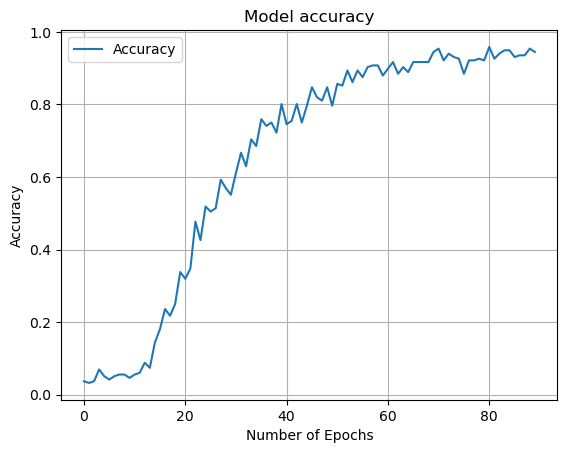

In [15]:
# Plotting Accuracy 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Accuracy'])
plt.grid()
plt.show()

# 8. Iterate the model until the accuracy is above 90%

In [16]:
print('We have an accuracy of', history.history['accuracy'][-1])

We have an accuracy of 0.9444444179534912
